## Importing Modules 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

#Attributes related with eating habits are:

Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

#Attributes related with the physical condition are:

Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

#Other variables were:

Gender, Age, Height and Weight.

## Loading data

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', encoding='ISO-8859-2')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


## Data Exploraion

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=45, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

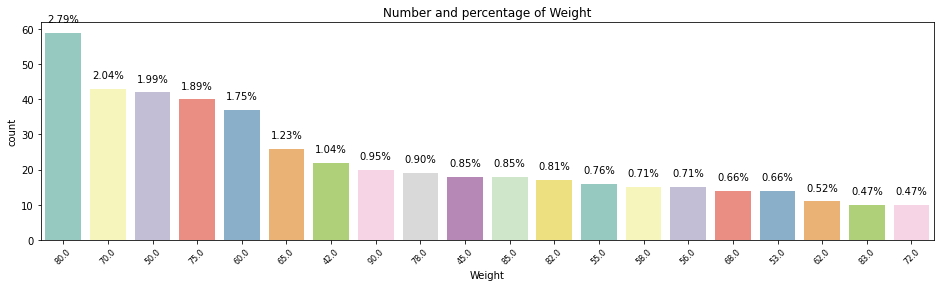

In [6]:
plot_count("Weight", "Weight", df,4)

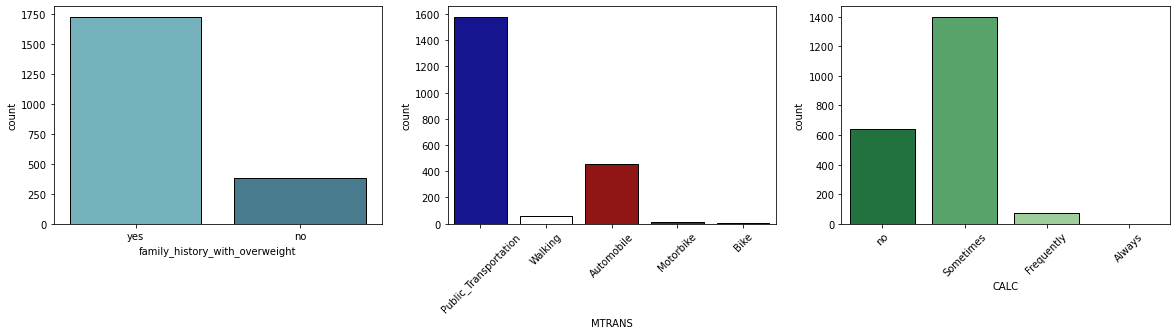

In [7]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'MTRANS', data = df, palette="flag",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = df, palette="Greens_r",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

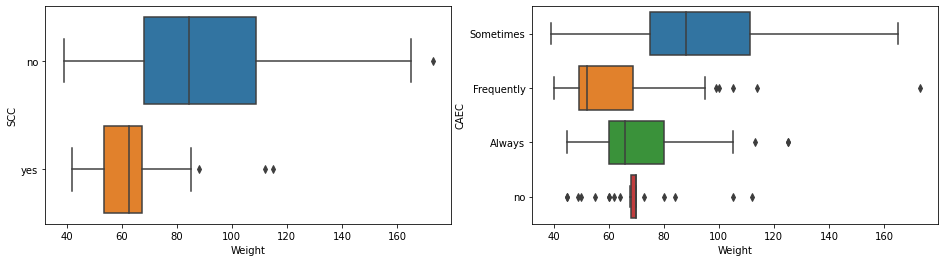

In [8]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data = df)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data = df)
plt.show()

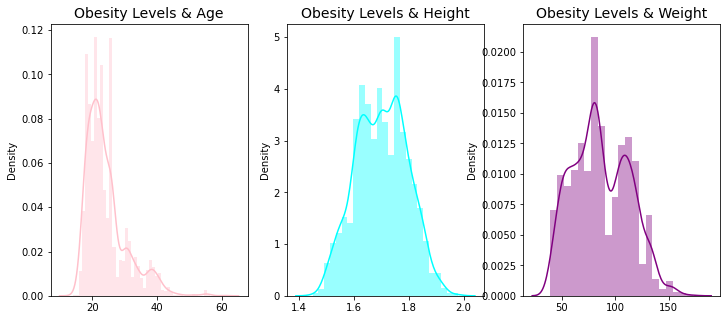

In [9]:
fig , ax = plt.subplots(1,3,figsize = (12,5))

Age = df.Age.values
Height= df.Height.values
Weight = df.Weight.values

sns.distplot(Age , ax = ax[0] , color = 'pink').set_title('Obesity Levels & Age' , fontsize = 14)
sns.distplot(Height , ax = ax[1] , color = 'cyan').set_title('Obesity Levels & Height' , fontsize = 14)
sns.distplot(Weight , ax = ax[2] , color = 'purple').set_title('Obesity Levels & Weight' , fontsize = 14)


plt.show()

In [10]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

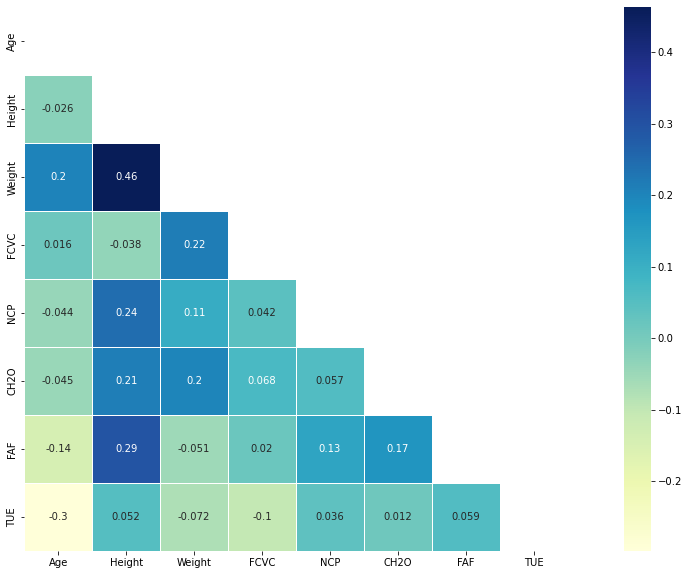

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidth=1, linecolor='w', square=True,mask=mask,cmap = 'YlGnBu')

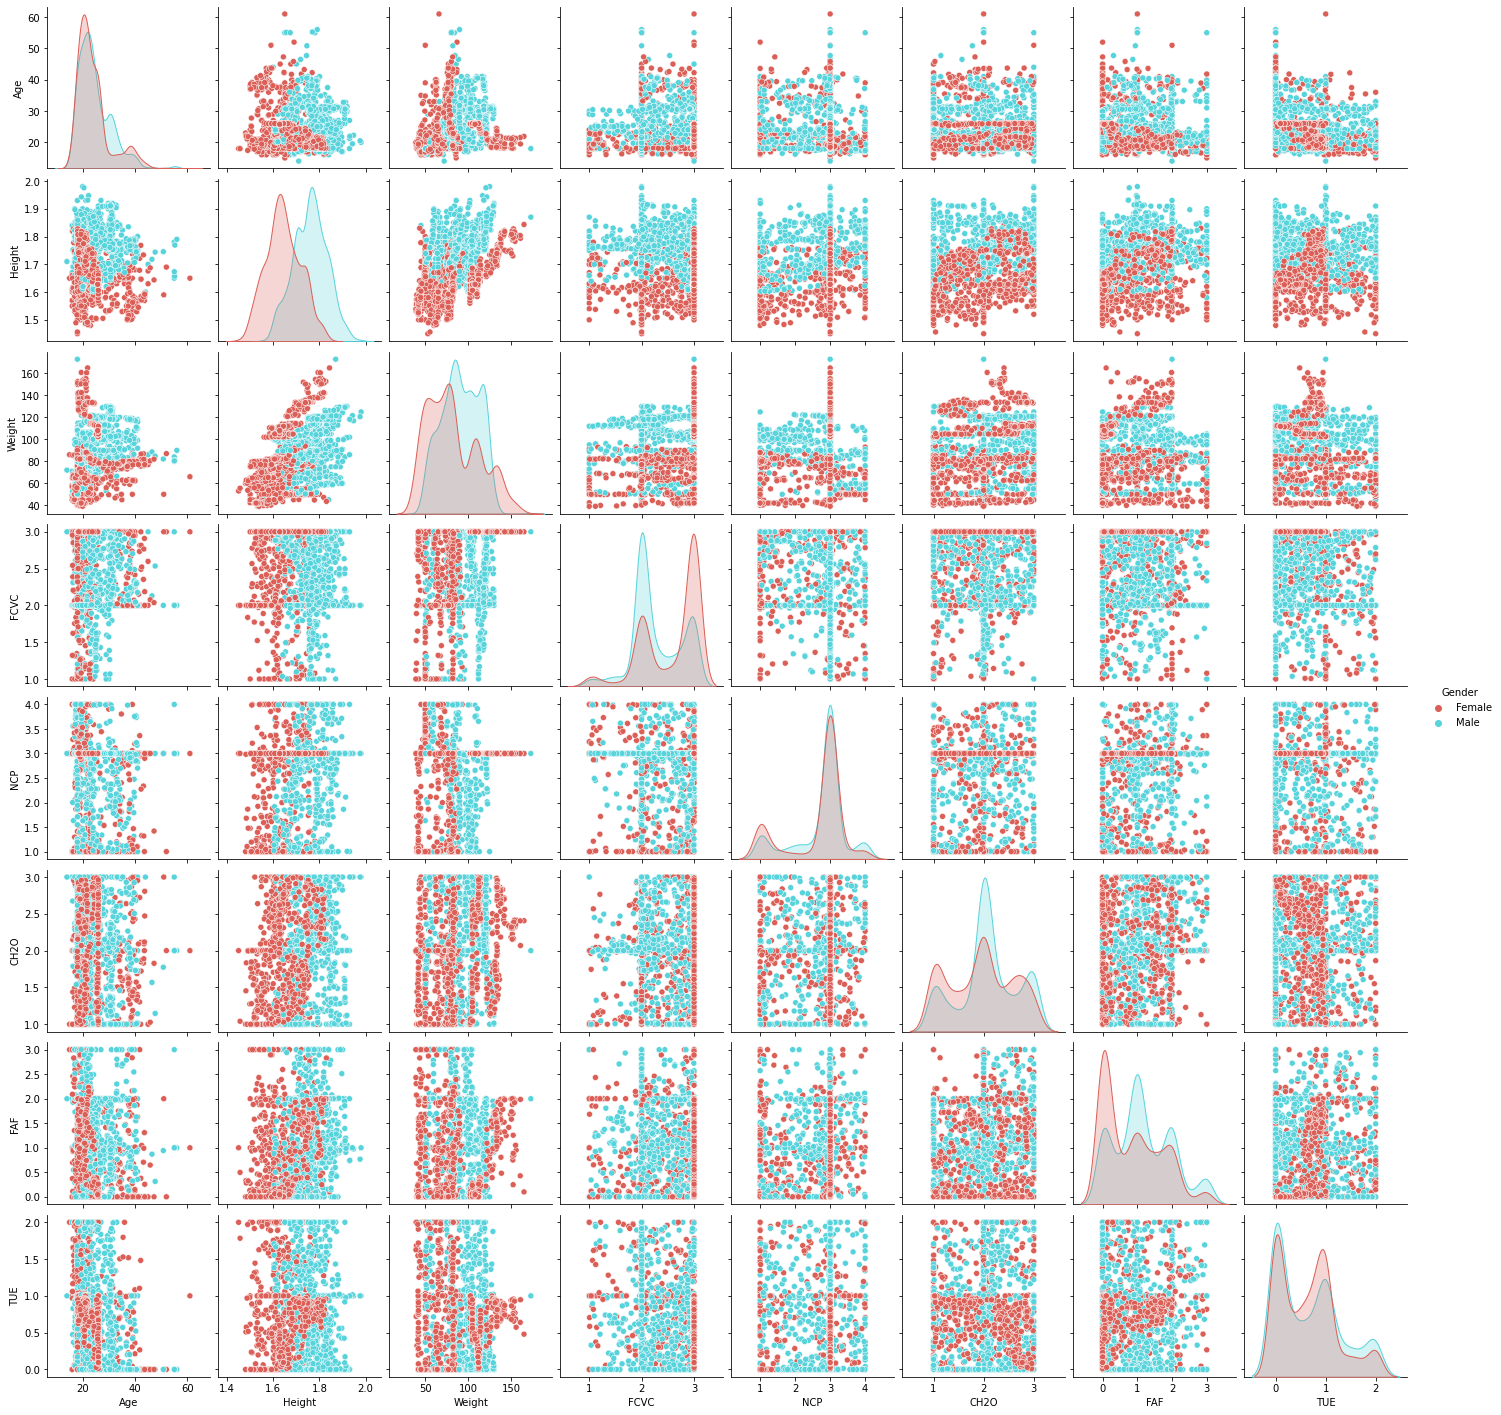

In [12]:
sns.pairplot(df,hue='Gender',palette='hls')

## Data Preprocessing 

### Encoding for non numeric data by two ways 1.get dummies 2.Labelencoder and drop the columns 

In [13]:
df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [14]:
df['Gender_enc'] = pd.get_dummies(df['Gender'],drop_first=True)
df['Gender_enc']

0       0
1       0
2       1
3       1
4       1
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Gender_enc, Length: 2111, dtype: uint8

In [15]:
df.drop(columns=df[['Gender']],axis=1,inplace=True)

In [16]:
df['family_history_with_overweight'].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [17]:
df['family_history_with_overweight_enc'] = pd.get_dummies(df['family_history_with_overweight'],drop_first=True)
df['family_history_with_overweight_enc']

0       1
1       1
2       1
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: family_history_with_overweight_enc, Length: 2111, dtype: uint8

In [18]:
df.drop(columns=df[['family_history_with_overweight']],axis=1,inplace=True)

In [19]:
df['SMOKE'].value_counts()

no     2067
yes      44
Name: SMOKE, dtype: int64

In [20]:
df['SMOKE_enc'] = pd.get_dummies(df['SMOKE'],drop_first=True)
df['SMOKE_enc']

0       0
1       1
2       0
3       0
4       0
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: SMOKE_enc, Length: 2111, dtype: uint8

In [21]:
df.drop(columns=df[['SMOKE']],axis=1,inplace=True)

In [22]:
df['FAVC'].value_counts()

yes    1866
no      245
Name: FAVC, dtype: int64

In [23]:
df['FAVC_enc'] = pd.get_dummies(df['FAVC'],drop_first=True)
df.drop(columns=df[['FAVC']],axis=1,inplace=True)
df['FAVC_enc']

0       0
1       0
2       0
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: FAVC_enc, Length: 2111, dtype: uint8

In [24]:
df['SCC'].value_counts()

no     2015
yes      96
Name: SCC, dtype: int64

In [25]:
df['SCC_enc'] = pd.get_dummies(df['SCC'],drop_first=True)
df.drop(columns=df[['SCC']],axis=1,inplace=True)
df['SCC_enc']

0       0
1       1
2       0
3       0
4       0
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: SCC_enc, Length: 2111, dtype: uint8

In [26]:
df['CALC'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [27]:
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [29]:
df['CALC_enc'] = enc.fit_transform(df['CALC'])
df['CALC_enc']

0       3
1       2
2       1
3       1
4       2
       ..
2106    2
2107    2
2108    2
2109    2
2110    2
Name: CALC_enc, Length: 2111, dtype: int32

In [30]:
df['MTRANS_enc'] = enc.fit_transform(df['MTRANS'])
df['MTRANS_enc']

0       3
1       3
2       3
3       4
4       3
       ..
2106    3
2107    3
2108    3
2109    3
2110    3
Name: MTRANS_enc, Length: 2111, dtype: int32

In [31]:
df['CAEC'].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [32]:
df['CAEC_enc'] = enc.fit_transform(df['CAEC'])
df['CAEC_enc']

0       2
1       2
2       2
3       2
4       2
       ..
2106    2
2107    2
2108    2
2109    2
2110    2
Name: CAEC_enc, Length: 2111, dtype: int32

In [33]:
df.drop(columns=df[['CALC','MTRANS','CAEC']],axis=1,inplace=True)

In [34]:
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_enc,family_history_with_overweight_enc,SMOKE_enc,FAVC_enc,SCC_enc,CALC_enc,MTRANS_enc,CAEC_enc
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0,1,0,0,0,3,3,2
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0,1,1,0,1,2,3,2
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,0,0,0,1,3,2
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1,0,0,0,0,1,4,2
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1,0,0,0,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,1,0,1,0,2,3,2
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,1,0,1,0,2,3,2
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,1,0,1,0,2,3,2
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,1,0,1,0,2,3,2


## Select X

In [35]:
X = df.iloc[:, :].values
X

array([[ 21.      ,   1.62    ,  64.      , ...,   3.      ,   3.      ,
          2.      ],
       [ 21.      ,   1.52    ,  56.      , ...,   2.      ,   3.      ,
          2.      ],
       [ 23.      ,   1.8     ,  77.      , ...,   1.      ,   3.      ,
          2.      ],
       ...,
       [ 22.524036,   1.752206, 133.689352, ...,   2.      ,   3.      ,
          2.      ],
       [ 24.361936,   1.73945 , 133.346641, ...,   2.      ,   3.      ,
          2.      ],
       [ 23.664709,   1.738836, 133.472641, ...,   2.      ,   3.      ,
          2.      ]])

## Clustering The Dataset

#### Applying Unsupervised Machine Learning K-means

##### Try to find optimal cluster number 

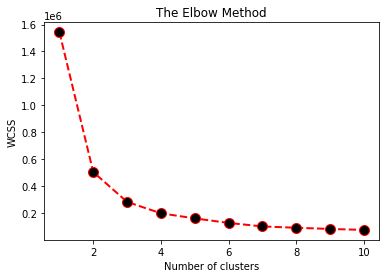

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,color='red', marker='o',mfc='k',linestyle='dashed',linewidth=2, markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

In [38]:
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [39]:
kmeans.cluster_centers_

array([[2.14867122e+01, 1.67342183e+00, 6.70448225e+01, 2.34328848e+00,
        2.66705245e+00, 2.00095092e+00, 1.11215179e+00, 6.63808423e-01,
        5.42857143e-01, 6.80519481e-01, 3.11688312e-02, 7.42857143e-01,
        1.14285714e-01, 2.31168831e+00, 2.48311688e+00, 1.84675325e+00],
       [2.65892638e+01, 1.73307671e+00, 1.10605234e+02, 2.55265380e+00,
        2.75276493e+00, 2.09768176e+00, 7.35561911e-01, 5.55598365e-01,
        6.81506849e-01, 9.94863014e-01, 1.02739726e-02, 9.84589041e-01,
        3.42465753e-03, 2.16267123e+00, 2.33219178e+00, 1.98972603e+00],
       [2.01848869e+01, 1.64330077e+00, 4.98977916e+01, 2.37413654e+00,
        2.77559506e+00, 1.78768506e+00, 1.13317732e+00, 8.37909679e-01,
        2.38636364e-01, 4.06250000e-01, 1.42045455e-02, 7.86931818e-01,
        1.05113636e-01, 2.37500000e+00, 2.78125000e+00, 1.51988636e+00],
       [2.22534174e+01, 1.72222163e+00, 8.56770914e+01, 2.17587480e+00,
        2.50463285e+00, 2.09772860e+00, 1.13323030e+00, 7.629

In [40]:
kmeans.inertia_

127165.42825622445

In [41]:
y_kmeans = kmeans.fit_predict(X)


In [42]:
df['Target'] = y_kmeans

In [43]:
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_enc,family_history_with_overweight_enc,SMOKE_enc,FAVC_enc,SCC_enc,CALC_enc,MTRANS_enc,CAEC_enc,Target
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0,1,0,0,0,3,3,2,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0,1,1,0,1,2,3,2,2
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,0,0,0,1,3,2,3
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1,0,0,0,0,1,4,2,3
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1,0,0,0,0,2,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,1,0,1,0,2,3,2,4
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,1,0,1,0,2,3,2,4
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,1,0,1,0,2,3,2,4
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,1,0,1,0,2,3,2,4


In [44]:
df.shape

(2111, 17)

In [45]:
df['Target'].value_counts()

1    584
3    440
0    385
2    352
5    184
4    166
Name: Target, dtype: int64

In [46]:
df.to_csv('new dataset')

<AxesSubplot:xlabel='Target', ylabel='count'>

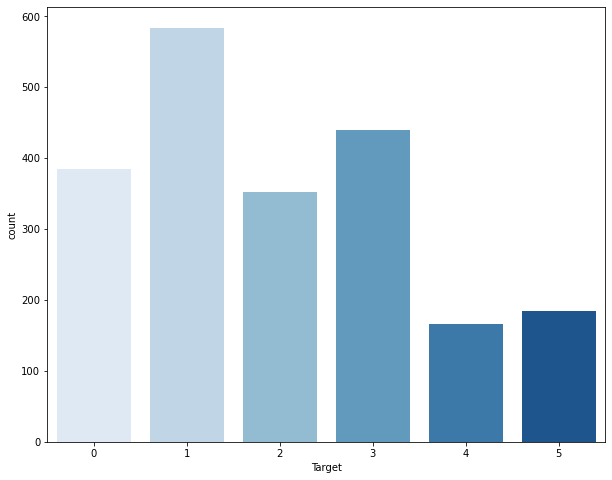

In [47]:
plt.figure(figsize = (10,8))
sns.countplot(x='Target',data=df,palette='Blues')

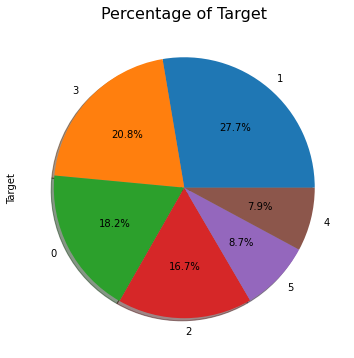

1    584
3    440
0    385
2    352
5    184
4    166
Name: Target, dtype: int64

In [48]:
value_counts = pd.value_counts(df['Target'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', autopct='%1.1f%%', shadow=True)
plt.title('Percentage of Target',fontdict={'fontsize':16})
plt.show()
value_counts

#### Applying Supervised Machine Learning 


#### Divide The Dataset 

In [49]:
X = df.drop(['Target'], axis = 1).values
X

array([[ 21.      ,   1.62    ,  64.      , ...,   3.      ,   3.      ,
          2.      ],
       [ 21.      ,   1.52    ,  56.      , ...,   2.      ,   3.      ,
          2.      ],
       [ 23.      ,   1.8     ,  77.      , ...,   1.      ,   3.      ,
          2.      ],
       ...,
       [ 22.524036,   1.752206, 133.689352, ...,   2.      ,   3.      ,
          2.      ],
       [ 24.361936,   1.73945 , 133.346641, ...,   2.      ,   3.      ,
          2.      ],
       [ 23.664709,   1.738836, 133.472641, ...,   2.      ,   3.      ,
          2.      ]])

In [50]:
y = df['Target'].values
print(y)

[0 2 3 ... 4 4 4]


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Using Supervised ML 

#### 1.KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=6)

In [53]:
y_pred_k = classifier.predict(X_test)
y_pred_k

array([2, 1, 0, 2, 0, 2, 1, 0, 3, 2, 3, 4, 1, 1, 1, 3, 4, 1, 1, 5, 1, 5,
       1, 1, 2, 0, 3, 4, 1, 2, 1, 5, 5, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 3,
       3, 2, 1, 0, 3, 1, 0, 2, 0, 0, 0, 5, 1, 1, 3, 1, 0, 1, 3, 0, 1, 3,
       0, 4, 2, 2, 5, 5, 2, 2, 0, 1, 4, 0, 1, 1, 0, 3, 1, 1, 5, 3, 0, 3,
       2, 3, 3, 1, 2, 0, 1, 0, 0, 3, 3, 1, 1, 5, 1, 1, 0, 5, 2, 4, 1, 1,
       3, 0, 1, 0, 2, 3, 3, 1, 3, 0, 1, 1, 3, 3, 5, 1, 3, 3, 4, 1, 1, 1,
       0, 3, 3, 1, 2, 4, 2, 3, 0, 3, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       5, 0, 3, 0, 2, 2, 0, 2, 5, 2, 1, 2, 1, 0, 2, 0, 0, 3, 1, 4, 5, 0,
       3, 5, 1, 0, 2, 1, 2, 0, 1, 1, 0, 4, 1, 1, 2, 1, 2, 0, 4, 5, 1, 3,
       4, 0, 1, 1, 1, 1, 0, 4, 0, 3, 1, 4, 0, 3, 2, 1, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 3, 4, 1, 2, 1, 0, 3, 0, 1, 0, 3, 0, 5, 3, 3, 1, 2, 3, 3,
       0, 1, 1, 1, 0, 1, 3, 0, 5, 1, 2, 3, 0, 3, 3, 1, 3, 5, 1, 4, 3, 1,
       3, 1, 4, 0, 0, 1, 1, 4, 3, 3, 1, 3, 1, 1, 1, 2, 2, 5, 3, 1, 1, 0,
       5, 5, 0, 1, 1, 3, 0, 1, 2, 3, 1, 1, 3, 3, 2,

In [54]:
y_pred_k.shape

(528,)

In [55]:
type(y_test)

numpy.ndarray

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
acc= accuracy_score(y_test,y_pred_k)
cm = confusion_matrix(y_test,y_pred_k)
clr = classification_report(y_test,y_pred_k)

In [58]:
print('accuracy_score is ',acc)

accuracy_score is  0.9829545454545454


In [59]:
print('confusion_matrix is ','\n',cm)

confusion_matrix is  
 [[ 99   0   0   0   0   0]
 [  0 155   0   0   1   0]
 [  3   0  88   0   0   0]
 [  0   1   0 108   0   2]
 [  0   0   0   0  36   0]
 [  1   0   0   1   0  33]]


<AxesSubplot:>

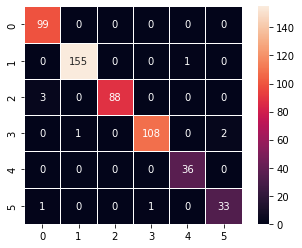

In [60]:
sns.heatmap(cm, annot=True,linewidth=1, linecolor='w', square=True,fmt="d")

In [61]:
print('classification report is ','\n',clr)

classification report is  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        99
           1       0.99      0.99      0.99       156
           2       1.00      0.97      0.98        91
           3       0.99      0.97      0.98       111
           4       0.97      1.00      0.99        36
           5       0.94      0.94      0.94        35

    accuracy                           0.98       528
   macro avg       0.98      0.98      0.98       528
weighted avg       0.98      0.98      0.98       528



#### 2.SVM

In [62]:
from sklearn.svm import SVC

In [63]:
svc_model = SVC(C=1.0,kernel='poly',degree=3,gamma='scale')

In [64]:
svc_model.fit(X_train, y_train)

SVC(kernel='poly')

In [65]:
y_pred_s = svc_model.predict(X_test)
y_pred_s

array([2, 1, 0, 2, 0, 2, 1, 0, 3, 2, 3, 4, 1, 1, 1, 3, 1, 1, 1, 5, 1, 5,
       1, 1, 2, 0, 3, 4, 1, 2, 1, 5, 3, 2, 2, 1, 1, 0, 2, 0, 2, 1, 3, 3,
       3, 2, 1, 2, 3, 1, 0, 2, 0, 0, 0, 5, 1, 1, 5, 1, 0, 1, 3, 2, 1, 3,
       0, 4, 2, 2, 5, 5, 2, 2, 0, 1, 1, 0, 1, 1, 0, 3, 1, 1, 5, 3, 2, 3,
       2, 3, 3, 1, 2, 0, 3, 0, 0, 3, 3, 1, 1, 5, 1, 1, 0, 5, 2, 4, 1, 1,
       3, 0, 1, 2, 2, 3, 3, 1, 3, 0, 1, 1, 3, 3, 5, 1, 3, 3, 4, 1, 1, 1,
       0, 3, 3, 1, 2, 4, 2, 3, 0, 3, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       5, 0, 3, 3, 2, 2, 0, 2, 5, 2, 1, 2, 1, 0, 2, 0, 0, 3, 1, 4, 5, 0,
       3, 3, 1, 0, 2, 1, 2, 0, 1, 1, 0, 4, 1, 1, 2, 1, 2, 0, 4, 0, 1, 3,
       4, 0, 1, 1, 1, 1, 0, 4, 0, 3, 1, 4, 0, 3, 2, 1, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 3, 4, 1, 2, 1, 0, 3, 0, 1, 0, 3, 0, 5, 3, 3, 1, 2, 3, 3,
       0, 1, 1, 1, 0, 1, 3, 0, 5, 1, 2, 3, 0, 3, 3, 1, 3, 5, 1, 4, 3, 3,
       3, 1, 4, 2, 0, 1, 1, 4, 3, 3, 1, 3, 1, 1, 1, 2, 2, 0, 3, 1, 1, 0,
       5, 5, 2, 1, 1, 3, 2, 1, 2, 3, 1, 1, 3, 3, 2,

In [66]:
acc= accuracy_score(y_test,y_pred_s)
cm = confusion_matrix(y_test,y_pred_s)
clr = classification_report(y_test,y_pred_s)

In [67]:
print('accuracy_score is ',acc)


accuracy_score is  0.9678030303030303


In [68]:
print('confusion_matrix is ','\n',cm)

confusion_matrix is  
 [[ 90   0   5   4   0   0]
 [  0 155   0   1   0   0]
 [  0   0  91   0   0   0]
 [  0   0   0 111   0   0]
 [  0   2   0   0  34   0]
 [  4   0   0   1   0  30]]


<AxesSubplot:>

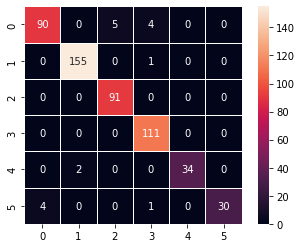

In [69]:
sns.heatmap(cm, annot=True,linewidth=1, linecolor='w', square=True,fmt="d")

In [70]:
print('classification report is ','\n',clr)

classification report is  
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        99
           1       0.99      0.99      0.99       156
           2       0.95      1.00      0.97        91
           3       0.95      1.00      0.97       111
           4       1.00      0.94      0.97        36
           5       1.00      0.86      0.92        35

    accuracy                           0.97       528
   macro avg       0.97      0.95      0.96       528
weighted avg       0.97      0.97      0.97       528



#### 3.Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
clf = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5, random_state=42)

In [73]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=42)

In [74]:
y_pred_t = clf.predict(X_test)

In [75]:
acc= accuracy_score(y_test,y_pred_t)
cm = confusion_matrix(y_test,y_pred_t)
clr = classification_report(y_test,y_pred_t)

In [76]:
print('accuracy_score is ',acc)

accuracy_score is  0.9299242424242424


In [77]:
print('confusion_matrix is ','\n',cm)

confusion_matrix is  
 [[ 99   0   0   0   0   0]
 [  0 156   0   0   0   0]
 [  0   0  91   0   0   0]
 [  0   2   0 109   0   0]
 [  0   0   0   0  36   0]
 [ 12   0   0  23   0   0]]


<AxesSubplot:>

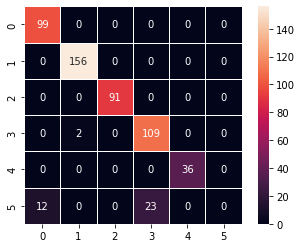

In [78]:
sns.heatmap(cm, annot=True,linewidth=1, linecolor='w', square=True,fmt="d")

In [79]:
print('classification report is ','\n',clr)

classification report is  
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        99
           1       0.99      1.00      0.99       156
           2       1.00      1.00      1.00        91
           3       0.83      0.98      0.90       111
           4       1.00      1.00      1.00        36
           5       0.00      0.00      0.00        35

    accuracy                           0.93       528
   macro avg       0.78      0.83      0.81       528
weighted avg       0.87      0.93      0.90       528



#### 4.Neural Network

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
clf_n = MLPClassifier(solver='adam', alpha=0.0001,hidden_layer_sizes=(5, 5),activation='relu' ,random_state=5)

In [82]:
clf_n.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), random_state=5)

In [83]:
y_pred_n = clf_n.predict(X_test)

In [84]:
acc= accuracy_score(y_test,y_pred_n)
cm = confusion_matrix(y_test,y_pred_n)
clr = classification_report(y_test,y_pred_n)

In [85]:
print('accuracy_score is ',acc)

accuracy_score is  0.8636363636363636


In [86]:
print('confusion_matrix is ','\n',cm)

confusion_matrix is  
 [[ 79   0   7   8   0   5]
 [  0 149   0   2   4   1]
 [ 15   0  76   0   0   0]
 [  7  14   0  88   0   2]
 [  0   3   0   0  33   0]
 [  3   0   0   1   0  31]]


<AxesSubplot:>

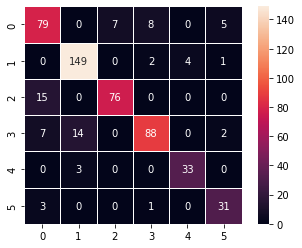

In [87]:
sns.heatmap(cm, annot=True,linewidth=1, linecolor='w', square=True,fmt="d")

In [88]:
print('classification report is ','\n',clr)

classification report is  
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        99
           1       0.90      0.96      0.93       156
           2       0.92      0.84      0.87        91
           3       0.89      0.79      0.84       111
           4       0.89      0.92      0.90        36
           5       0.79      0.89      0.84        35

    accuracy                           0.86       528
   macro avg       0.86      0.86      0.86       528
weighted avg       0.87      0.86      0.86       528



In [95]:
new_data = [[26.0,1.85,80.0,3.0,3.0,3.0,2.0,2.0,1,1,0,1,0,2,3,1]]

In [96]:
y_pred_new = svc_model.predict(new_data)
y_pred_new

array([3])

In [97]:

y_pred_new = clf.predict(new_data)
y_pred_new

array([3])